In [28]:
# Dependencies
import pandas as pd
import numpy as np
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [7]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)

In [8]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()
print(june_results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [14]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['date', 'June Temps'])
print(june_df.to_string(index=False))

      date  June Temps
2010-06-01        78.0
2010-06-02        76.0
2010-06-03        78.0
2010-06-04        76.0
2010-06-05        77.0
2010-06-06        78.0
2010-06-07        77.0
2010-06-08        78.0
2010-06-09        78.0
2010-06-10        79.0
2010-06-11        78.0
2010-06-12        78.0
2010-06-13        78.0
2010-06-14        77.0
2010-06-15        78.0
2010-06-16        78.0
2010-06-17        77.0
2010-06-18        77.0
2010-06-19        82.0
2010-06-20        78.0
2010-06-21        78.0
2010-06-22        78.0
2010-06-23        78.0
2010-06-24        78.0
2010-06-25        77.0
2010-06-26        76.0
2010-06-27        78.0
2010-06-28        78.0
2010-06-29        78.0
2010-06-30        78.0
2011-06-01        77.0
2011-06-02        78.0
2011-06-03        73.0
2011-06-04        70.0
2011-06-05        76.0
2011-06-06        77.0
2011-06-07        77.0
2011-06-08        77.0
2011-06-09        77.0
2011-06-10        78.0
2011-06-11        77.0
2011-06-12        77.0
2011-06-13 

In [16]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


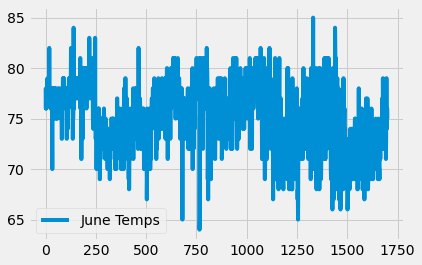

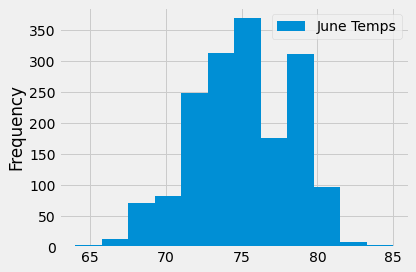

In [30]:
june_df.plot()
june_df.plot.hist(bins=12)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [17]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)
print(dec_results)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [18]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()
print (dec_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [19]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['date', 'Dec Temps'])
print(dec_df.to_string(index=False))

      date  Dec Temps
2010-12-01       76.0
2010-12-03       74.0
2010-12-04       74.0
2010-12-06       64.0
2010-12-07       64.0
2010-12-08       67.0
2010-12-09       77.0
2010-12-10       66.0
2010-12-11       69.0
2010-12-12       68.0
2010-12-13       68.0
2010-12-14       71.0
2010-12-15       74.0
2010-12-16       67.0
2010-12-17       66.0
2010-12-18       69.0
2010-12-19       71.0
2010-12-23       70.0
2010-12-24       70.0
2010-12-26       74.0
2010-12-27       74.0
2010-12-28       71.0
2010-12-29       75.0
2010-12-30       75.0
2010-12-31       72.0
2011-12-01       69.0
2011-12-02       68.0
2011-12-03       73.0
2011-12-04       74.0
2011-12-05       73.0
2011-12-06       73.0
2011-12-07       73.0
2011-12-08       73.0
2011-12-09       71.0
2011-12-10       73.0
2011-12-11       73.0
2011-12-12       77.0
2011-12-13       72.0
2011-12-14       71.0
2011-12-15       73.0
2011-12-16       70.0
2011-12-17       73.0
2011-12-18       69.0
2011-12-19       74.0
2011-12-20

In [21]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


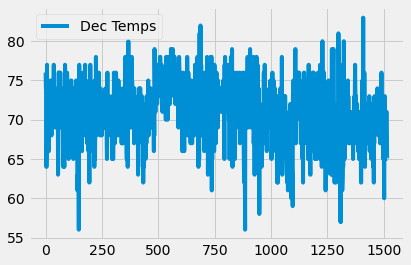

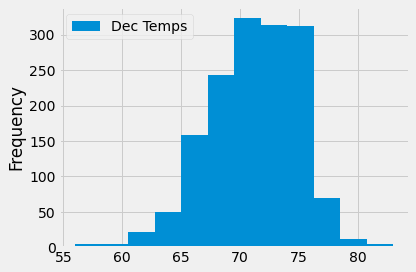

In [31]:
dec_df.plot()
dec_df.plot.hist(bins=12)
plt.tight_layout()

In [164]:
june_station = session.query(Measurement.station, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()
june_station_df=pd.DataFrame(june_station, columns=['Station','June Temperature'])
june_station_df=june_station_df.loc[(june_station_df['June Temperature']==73)]
june_station_df

,Station,June Temperature
32,USC00519397,73.0
80,USC00519397,73.0
81,USC00519397,73.0
105,USC00519397,73.0
135,USC00519397,73.0
...,...,...
1661,USC00516128,73.0
1665,USC00516128,73.0
1667,USC00516128,73.0
1682,USC00516128,73.0


In [165]:
dec_station = session.query(Measurement.station, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()
dec_station_df=pd.DataFrame(dec_station, columns=['Station','Dec Temperature'])
dec_station_df=dec_station_df.loc[(dec_station_df['Dec Temperature']<=73)]
dec_station_df

,Station,Dec Temperature
3,USC00519397,64.0
4,USC00519397,64.0
5,USC00519397,67.0
7,USC00519397,66.0
8,USC00519397,69.0
...,...,...
1512,USC00516128,71.0
1513,USC00516128,71.0
1514,USC00516128,69.0
1515,USC00516128,65.0


In [175]:
station=june_station_df.merge(dec_station_df, how='outer', on='Station')
station_df=pd.DataFrame(station)
station_df.drop_duplicates(inplace= True)
station_df.dropna(inplace= True)
station_df=station_df.loc[(station_df['June Temperature']==73)&(station_df['Dec Temperature']==73)]
station_df

,Station,June Temperature,Dec Temperature
18,USC00519397,73.0,73.0
888,USC00513117,73.0,73.0
4982,USC00514830,73.0,73.0
6291,USC00517948,73.0,73.0
6762,USC00518838,73.0,73.0
6887,USC00519523,73.0,73.0
8114,USC00519281,73.0,73.0
14187,USC00511918,73.0,73.0
15888,USC00516128,73.0,73.0
